> #### Adam Partl
> ## Bachelor thesis
> # Optimizing the automatic prediction of conversion to mild cognitive impairment using machine learning algorithms

### EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/data.csv', low_memory=False)

Firstly we analyze the structure of the dataset

In [80]:
print(len(df.columns))
print(list(df.columns))

969
['NACCID', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCREFR', 'SEX', 'HISPANIC', 'HISPOR', 'HISPORX', 'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'PRIMLANG', 'PRIMLANX', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NEWINF', 'INHISPOR', 'INHISPOX', 'NACCNINR', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX', 'INRELTOX', 'INKNOWN', 'INVISITS', 'INCALLS', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX', 'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10', 'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18', 'DRUG19', 'DRUG20', 'DRUG21', 'DRUG22', 'DRUG23', 'DRUG24', 'DRUG25', 'DRUG26', 'DRUG27', 'DRUG28', 'DRUG29', 'DRUG30', 'DRUG31', 'DRUG32', 'DRUG33', 'DRUG34', 'DRUG35', 'DRUG36', 'DRUG37', 'DRUG38', 'DRUG39', 'DRUG40', 'TOBAC30', 'TOBAC100', '

As can be seen, the dataset contains 969 columns 

In [81]:
count_non_nan_rows = df.dropna().shape[0]
count_rows = df.shape[0]
print("all: ", count_rows, "non-nan: ", count_non_nan_rows)

all:  29673 non-nan:  0


Now, we are going to be decoding the missing values. Since the missing values are typically encoded as -4, 8, 9, 88, 99, 888, 999..., we will attempt to programmatically approach this issue instead of manually checking each column in the dictionary.
Firsly we will define exceptions, such as NACCADC, 
Then we proceed by filtering the columns, which have the maximum of '9' and change the values to NaN.
Then we filter the columns, that have the maximum of '8' and manually check in the dictionary, which are encoded and which are valid entries. After that, we can filter out the columns where 8 is an encoded value, and change the given values to NaN.
Alternatively load the PDF dictionary and use an OCR to read the content, followed by cross checking the column names (too much work for a one-time task, unreliable).


In [3]:
max_vals = df.select_dtypes(include='number').max()
print(max_vals)
max_9 = max_vals[max_vals == 9].index.tolist()
print("max 9: \n")
print(max_9)
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan
    
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()
print("max 8: \n")
print(max_8)


VISITMO               12.0
VISITDAY              31.0
VISITYR             2024.0
NACCREFR               8.0
SEX                    2.0
                     ...  
NPATGFR2               8.0
NPATGFR3               8.0
NPATGFR4               9.0
OUTCOME_EVENTMCI       1.0
TIME                  20.0
Length: 834, dtype: float64
max 9: 

['NACCAM', 'NACCAMS', 'NACCFM', 'NACCFMS', 'NACCOM', 'NACCOMS', 'ALCOCCAS', 'ALCFREQ', 'HATTMULT', 'CVPACDEF', 'CVPACE', 'CVANGINA', 'CVHVALVE', 'STROKMUL', 'TIAMULT', 'TBI', 'TBIBRIEF', 'TRAUMBRF', 'TBIEXTEN', 'TRAUMEXT', 'TBIWOLOS', 'TRAUMCHR', 'NCOTHR', 'ARTHRIT', 'ARTHTYPE', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP', 'PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY', 'OCD', 'NPSYDEV', 'FOCLDEF', 'GAITDIS', 'EYEMOVE', 'COGORI', 'COGFLUC', 'BEVWELL', 'BEREM', 'BEANX', 'MOMOPARK', 'MOMOALS', 'UDSBENRS', 'OTHMUT', 'FTLDSUBT', 'STKIMAG', 'INFNETW', 'INFWMH', 'BRNINCTE', 'ALCABUSE', 'DIABET', 'ARTYPE', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS'

The following columns are the ones where the maximum is 8, but they are not present in the data dictionary, so it is not possible to asses if the value 8 is a valid record or an indication of missing value. 
'NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'

The following columns, are the ones where the maximum value is 8, but it is a valid record, usually meaning 'Yes, other', 'No diagnosis of Dementia', etc.:
'NACCREFR', 'NACCAM', 'NACCAMS', 'NACCFM', 'NACCFMS', 'NACCCOGF', 'NACCPPA', 'NACCPPAG', 'NACCPPME', 'NACCALZD', 'NACCALZP', 'PROBAD', 'PROBADIF', 'POSSAD', 'POSSADIF', 'NACCLBDE', 'NACCLBDP', 'MSAIF', 'PSPIF', 'CORTIF', 'FTLDMOIF', 'FTLDNOIF', 'FTD', 'FTDIF', 'VASCPS', 'VASCPSIF', 'STROKIF', 'ESSTREIF', 'DOWNSIF', 'HUNTIF', 'PRIONIF', 'BRNINJIF', 'BRNINCTE', 'EPILEPIF', 'NEOPIF', 'NEOPSTAT', 'HIVIF', 'OTHCOGIF', 'DEPIF', 'DEPTREAT', 'BIPOLDIF', 'SCHIZOIF', 'ANXIETIF', 'DELIRIF', 'PTSDDXIF', 'OTHPSYIF', 'ALCDEM', 'ALCDEMIF', 'ALCABUSE', 'IMPSUBIF', 'DYSILLIF', 'MEDSIF', 'DEMUN', 'DEMUNIF', 'COGOTHIF', 'COGOTH2F', 'COGOTH3F', 'NACCNOVS'



The following columns, where the maximum value is 8, and we need to change it to NaN, since the 8 represents statuses as Unknon, not applicable, etc.
'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'


In [4]:
missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()
print("max 8: \n")
print(max_8)

max 8: 

['NACCREFR', 'NACCAM', 'NACCAMS', 'NACCFM', 'NACCFMS', 'NACCOMS', 'PARKGAIT', 'NACCCOGF', 'NACCPPA', 'NACCPPAG', 'NACCPPME', 'NACCALZD', 'NACCALZP', 'PROBAD', 'PROBADIF', 'POSSAD', 'POSSADIF', 'NACCLBDE', 'NACCLBDP', 'MSAIF', 'PSPIF', 'CORTIF', 'FTLDMOIF', 'FTLDNOIF', 'FTD', 'FTDIF', 'PPAPH', 'PPAPHIF', 'FTLDSUBT', 'CVDIF', 'STROKDEC', 'STKIMAG', 'VASC', 'VASCIF', 'VASCPS', 'VASCPSIF', 'STROKIF', 'ESSTREIF', 'DOWNSIF', 'HUNTIF', 'PRIONIF', 'BRNINJIF', 'BRNINCTE', 'EPILEPIF', 'NEOPIF', 'NEOPSTAT', 'HIVIF', 'OTHCOGIF', 'DEPIF', 'DEPTREAT', 'BIPOLDIF', 'SCHIZOIF', 'ANXIETIF', 'DELIRIF', 'PTSDDXIF', 'OTHPSYIF', 'ALCDEM', 'ALCDEMIF', 'ALCABUSE', 'IMPSUBIF', 'DYSILLIF', 'MEDSIF', 'DEMUN', 'DEMUNIF', 'COGOTHIF', 'COGOTH2F', 'COGOTH3F', 'NACCNOVS', 'NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHE

In [5]:
max_vals = df.select_dtypes(include='number').max()
max_99 = max_vals[max_vals == 99].index.tolist()
print("max 99: \n")
print(max_99)
max_99 = max_vals[max_vals == 999].index.tolist()
print("max 999: \n")
print(max_99)

max 99: 

[]
max 999: 

[]


As can be seen, the records which have a maximum of 99 or 999 (usual missing values) do not exist, so we do not need to treat this missing value patterns

In [85]:
print(df.describe())

            VISITMO      VISITDAY       VISITYR      NACCREFR           SEX  \
count  29673.000000  29673.000000  29673.000000  28889.000000  29673.000000   
mean       6.347555     15.546962   2013.687662      3.262834      1.611802   
std        3.409613      8.607724      6.098801      2.962000      0.487348   
min        1.000000      1.000000   2005.000000      1.000000      1.000000   
25%        3.000000      8.000000   2008.000000      1.000000      1.000000   
50%        6.000000     15.000000   2013.000000      2.000000      2.000000   
75%        9.000000     23.000000   2019.000000      8.000000      2.000000   
max       12.000000     31.000000   2024.000000      8.000000      2.000000   

           HISPANIC       HISPOR          RACE     RACESEC     RACETER  \
count  29541.000000  2752.000000  29458.000000  988.000000  201.000000   
mean       0.095799     4.986555      2.075599    8.094130    7.000000   
std        0.294320    10.269939      6.007969   15.400044   14.37

In [86]:
print(df.describe(exclude=np.number))

            NACCID HISPORX     RACEX  RACESECX RACETERX PRIMLANX INHISPOX  \
count        29673     132       445       116       18      401      113   
unique       29673      68       125        77       16      162       68   
top     NACC995870   Spain  HISPANIC  Hispanic  Mestizo   German    Spain   
freq             1      21        77         8        2       25       13   

         INRACEX INRASECX INRATERX INRELTOX NACCAMX NACCAMSX NACCFMX NACCFMSX  \
count        566      151       32      357    3132     3115    3116     3110   
unique       201       94       31      179      22       11      12        6   
top     HISPANIC   Jewish    Human     self       .        .       .        .   
freq          91       12        2       39    3105     3105    3103     3105   

       NACCOMX NACCOMSX                                DRUG3         DRUG4  \
count     3162     2172                                22292         19399   
unique      53       16                             

In [87]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Columns: 969 entries, NACCID to TIME
dtypes: float64(781), int64(53), object(135)
memory usage: 219.4+ MB
None


For the data description we are working with the NACC UDS Resarchers Data Dictionary (https://files.alz.washington.edu/documentation/uds3-rdd.pdf)
Among the most important columns are:
> Cognitive Assessments
- NACCMMSE - Mini-Mental State Examination (MMSE) score
- NACCMOCA - Montreal Cognitive Assesment (MoCA) score
- MEMORY, ORIENT, JUDGMENT - Cognitive function and dementia rating variables

> Neuropsychiatric Symptoms
- DEL, HALL, AGIT, DEPD, ANX, APA, DISN - symptoms related to hallucinations, delusions, agitation, depression, anxiety, apathy, and disinhibition

> Family history and Genetic Risk
- NACCFAM - Family history of cognitive impairment
- NACCAM, NACCFADM - Alzheimer's related genetic mutations

> Functional Activities
- FAQ - BILLS, SHOPPING, STOVE, TRAVEL - decline in daily activities

> Neurological and Physical Exam Findings
- PARKSIGN, GAITDIS, RIGDL, BRADY - Parkinson signs and gait disorders
- CVDCOG, CBSTROKE, CORTDEF - Cerebrovascular disease and cortical deficits

> Clinician Judgment
- COGMEM, COGJUDG, COGLAND, COGATTN - Clinician-assessed impairment domains

Firstly we group the data by NACCUDSD - cognitive status assesment after visit (impaired - not MCI, MCI, Normal, Dementia)

In [6]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

grouped = df.groupby('CognitiveStatus')

Now we can analyze selected columns separately based on the cognitive status of the patient
We will start with 
> Cognitive Assessments

In [7]:
invalid_values = [88,95,96,97,98,99,-4]
for col in ['NACCMMSE', 'NACCMOCA']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)
    
for col in ['MEMORY', 'ORIENT', 'JUDGMENT']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [90]:
summary_stats = grouped[['NACCMMSE', 'NACCMOCA', 'MEMORY', 'ORIENT', 'JUDGMENT']].describe()
print(summary_stats)

                 NACCMOCA                                                     \
                    count       mean       std   min   25%   50%   75%   max   
CognitiveStatus                                                                
Impaired-Not-MCI    829.0  23.539204  3.791354   5.0  21.0  24.0  26.0  30.0   
MCI                2947.0  22.267730  3.728651   5.0  20.0  23.0  25.0  30.0   
Normal             8508.0  26.210860  2.744770  10.0  25.0  27.0  28.0  30.0   

                   MEMORY                                               \
                    count      mean       std  min  25%  50%  75%  max   
CognitiveStatus                                                          
Impaired-Not-MCI   2250.0  0.322444  0.312989  0.0  0.0  0.5  0.5  3.0   
MCI                6907.0  0.522224  0.256211  0.0  0.5  0.5  0.5  3.0   
Normal            20516.0  0.053324  0.161286  0.0  0.0  0.0  0.0  2.0   

                   ORIENT                                               \


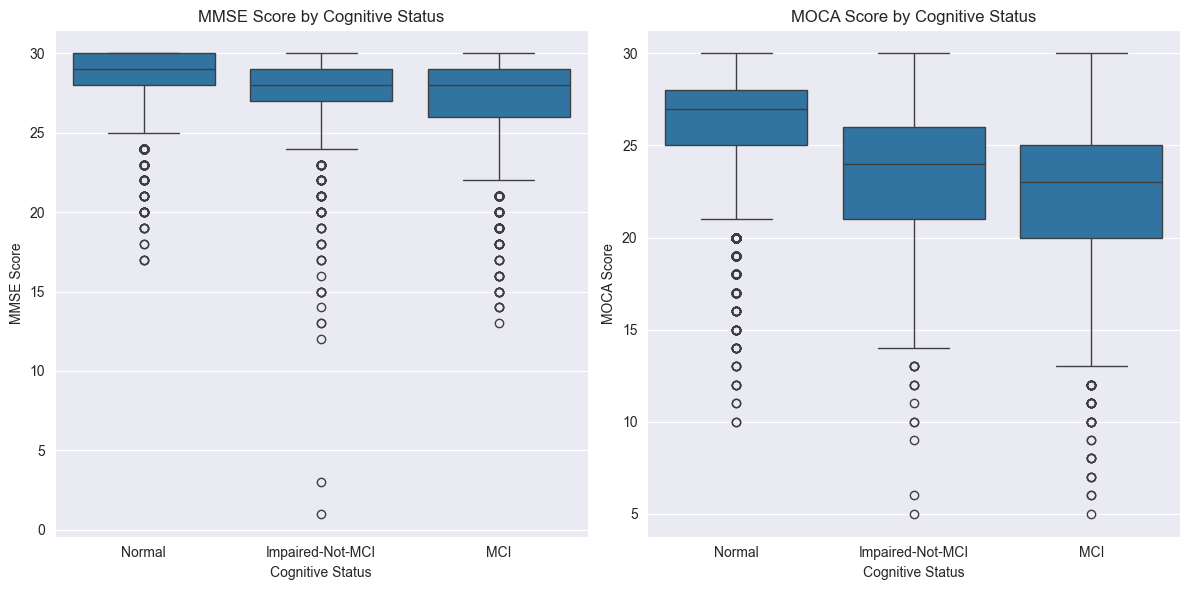

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='CognitiveStatus', y='NACCMMSE', data=df, order=status_labels.values())
plt.title('MMSE Score by Cognitive Status')
plt.xlabel('Cognitive Status')
plt.ylabel('MMSE Score')

plt.subplot(1,2,2)
sns.boxplot(x='CognitiveStatus', y='NACCMOCA', data=df, order=status_labels.values())
plt.title('MOCA Score by Cognitive Status')
plt.xlabel('Cognitive Status')
plt.ylabel('MOCA Score')

plt.tight_layout()
plt.show()

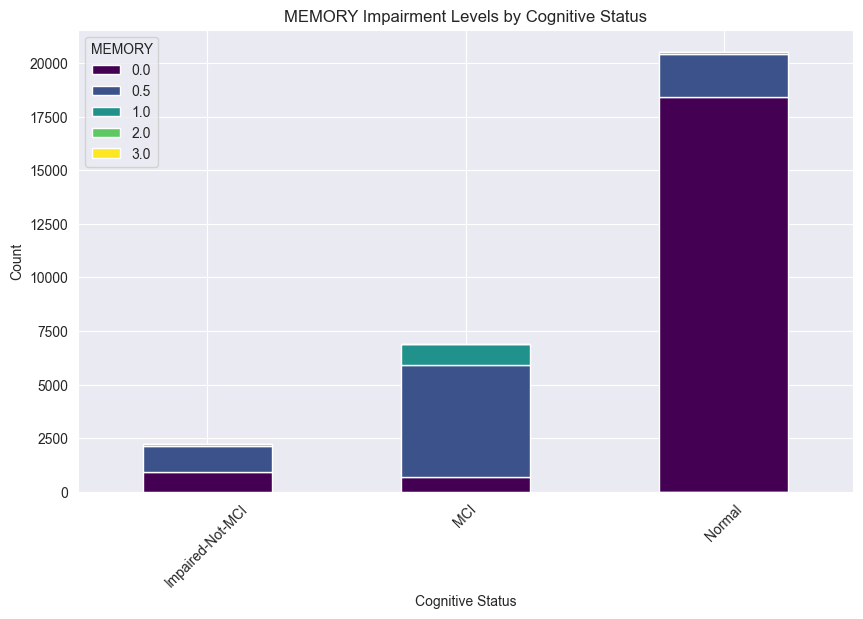

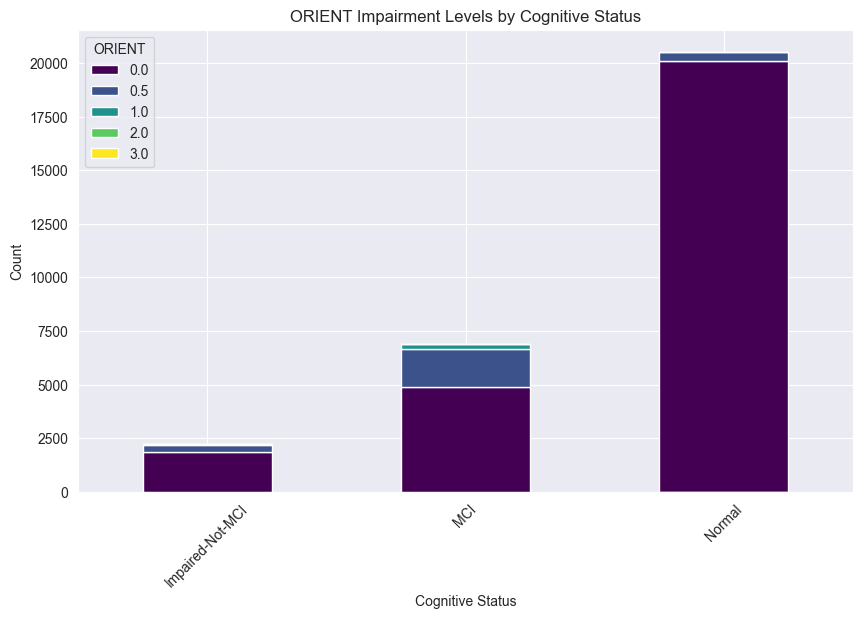

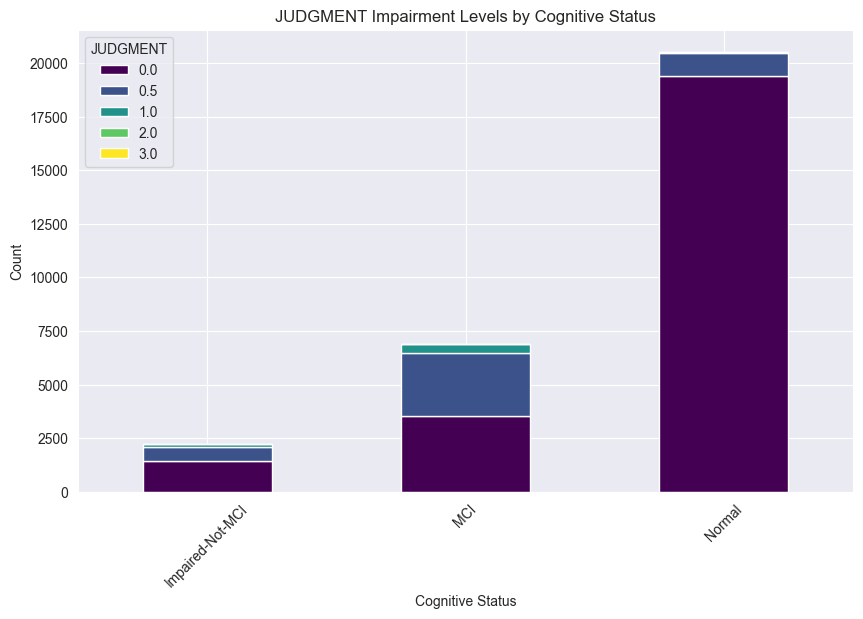

In [92]:
impairment_vars = ['MEMORY', 'ORIENT', 'JUDGMENT']
for var in impairment_vars:
    impairment_counts = df.groupby(['CognitiveStatus', var]).size().unstack()
    impairment_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.title(f"{var} Impairment Levels by Cognitive Status")
    plt.xlabel('Cognitive Status')
    plt.ylabel('Count')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.show()

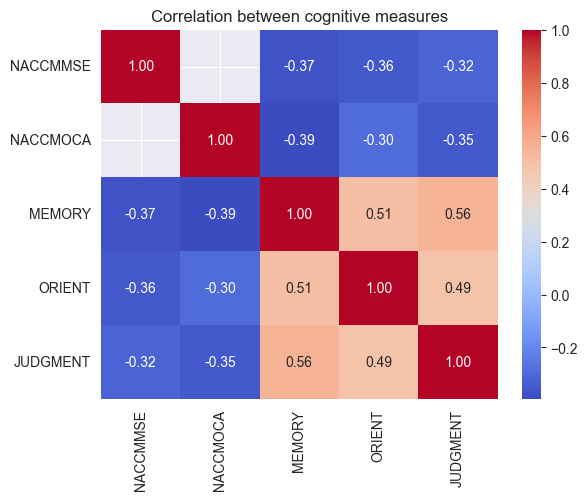

In [93]:
filtered_df = df.dropna(subset=["NACCMMSE", "NACCMOCA"], how='all')
corr = filtered_df[['NACCMMSE', 'NACCMOCA', 'MEMORY', 'ORIENT', 'JUDGMENT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between cognitive measures')
plt.show()

From the data and graphs, we can observe the following:
- NACCMMSE
    -   the mean score is highest for the Normal group, lower for MCI and lowest for Impaired-Not-MCI
    - the standard deviation is volatile
- NACCMOCA
    - the mean score follows similar pattern to the NACCMMSE
    - the standard deviation is consistent across all groups
    - the minimum score of 5 suggest slight cognitive impairment among all groups
- Memory
    - Normal group has the lowest mean impairment, MCI group highest, suggesting frequent memory issues
    - Maximum memory impairment score is present in all groups, but is rare in the Normal group
- Orientation
    - Normal group shows almost no impairment, MCI group is the highest
    - Maximum value is present in all groups, suggesting extreme cases 
- Judgment
    - Normal group has very low score, MCI is the highest
    - Maximum value is present in all groups, suggesting extreme cases 

The correlation matrix suggests, that there is a link between memory, orientation and judgment. Considering the NACCMMSE and NACCMOCA, the strongest correlation is with memory impairment.
              
   

> Neuropshychiatric symptoms

Similarly to earlier we group the data by Cognitive Status

In [94]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

grouped = df.groupby('CognitiveStatus')

In [95]:
invalid_values = [9,-4]
for col in ['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [96]:
counts = df[['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']].sum()
print(counts)

DEL      453.0
HALL     216.0
AGIT    2480.0
DEPD    5304.0
ANX     4126.0
APA     2426.0
DISN    1373.0
dtype: float64


In [97]:
proportions = grouped[['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']].mean()
print(proportions)

                       DEL      HALL      AGIT      DEPD       ANX       APA  \
CognitiveStatus                                                                
Impaired-Not-MCI  0.035900  0.015130  0.149197  0.277541  0.224905  0.146168   
MCI               0.035633  0.018417  0.169912  0.311453  0.258865  0.185816   
Normal            0.007543  0.003323  0.055213  0.141010  0.102908  0.047277   

                      DISN  
CognitiveStatus             
Impaired-Not-MCI  0.105637  
MCI               0.095832  
Normal            0.027433  


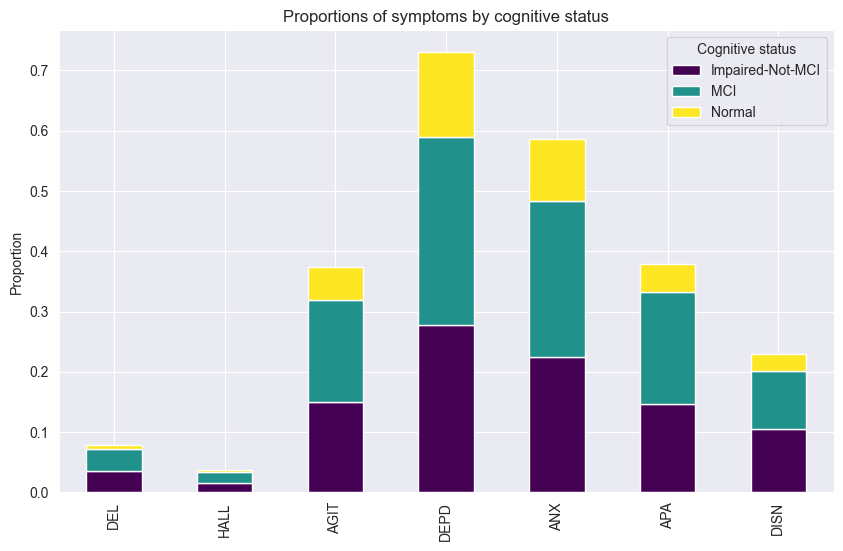

In [98]:
proportions.T.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.ylabel('Proportion')
plt.title("Proportions of symptoms by cognitive status")
plt.legend(title='Cognitive status')
plt.show()

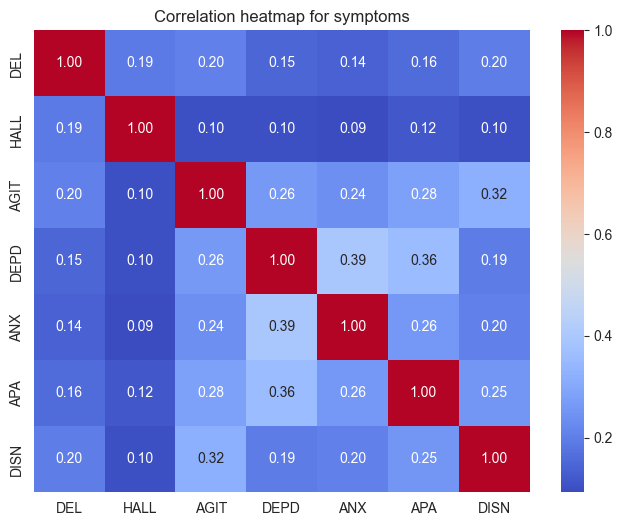

In [99]:
corr = df[['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']].corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap for symptoms')
plt.show()

In [100]:
for col in ['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']:
    contingency_table = pd.crosstab(df[col], df['CognitiveStatus'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}: p-value = {p}")

Chi-Square test for DEL: p-value = 2.5379044549937484e-64
Chi-Square test for HALL: p-value = 2.6573234845306945e-35
Chi-Square test for AGIT: p-value = 3.5833784686156743e-193
Chi-Square test for DEPD: p-value = 1.6102896581161303e-222
Chi-Square test for ANX: p-value = 6.2485988643037326e-226
Chi-Square test for APA: p-value = 7.654347718413558e-276
Chi-Square test for DISN: p-value = 1.0754269936543116e-138


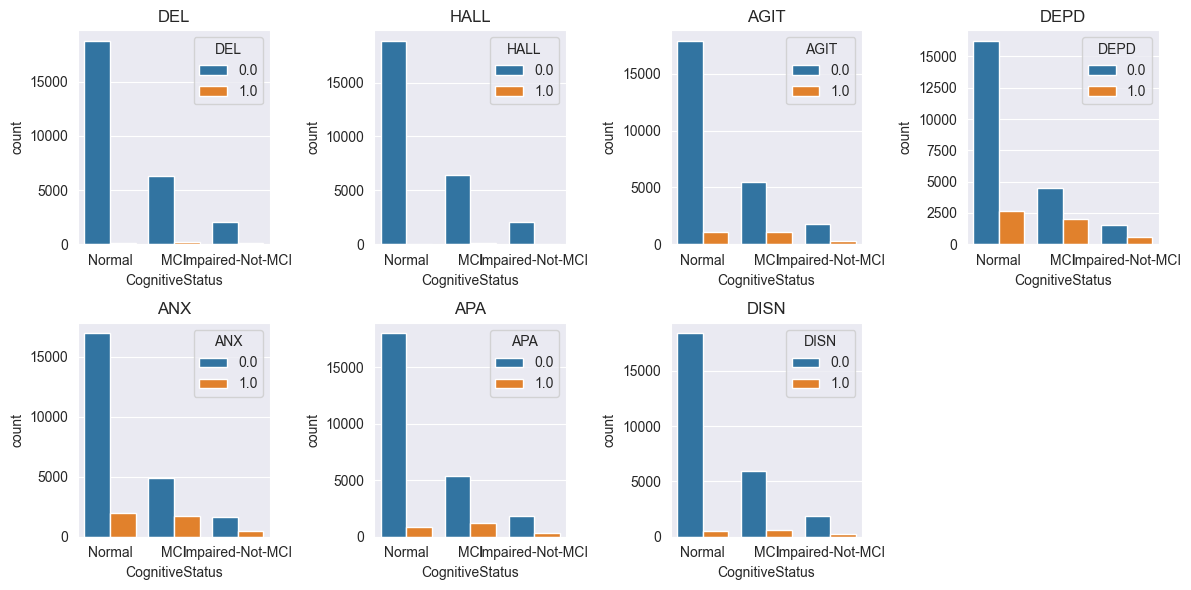

In [101]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']):
    plt.subplot(2,4,i+1)
    sns.countplot(x='CognitiveStatus', hue=col, data=df)
    plt.title(col)
    
plt.tight_layout()
plt.show()

From the data and graphs, we can observe the following:
- Symptom Prevalence
    - The occurences of each symptom show that depression (DEPD) and anxiety (ANX) are the most common symptoms, while hallucinations (HALL) and delusions (DEL) are the least frequent
    - Most prevalent is Depression (5304) and leas prevalent is Hallucinations (216)
- Symptom Proportions
    - All symptoms are more common in the MCI an Impaired-Not-MCI groups, compared to Normal
    - Psychotic symptoms (DEl, HALL) are very rare across all groups, but are vastly more represented in MCI and Impaired-Not-MCI groups   
    - Disinhibition and Delusions are highest in Impaired-Not-MCI group, the rest is highest in the MCI group.
- Chi-squared test results:
    - all p-values are < 0.05, which indicates that all symptoms are associated with cognitive status
    - Apathy and Anxiety have the strongest association       
- Correlation Matrix:
    - Most correlations are relatively low, the highest ones are 0.3-0.4 suggesting some associations
    - Depression and Anxiety have the strongest correlation, which suggest that people with depression often also have anxiety
    - Depression also has a strong correlation with apathy
    - Hallucinations and delusions have the weakest correlation, indicating that they are independent  

> Family History and Genetic Risk

In [102]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

grouped = df.groupby('CognitiveStatus')

In [103]:
invalid_values = [9,-4]
for col in ['NACCFAM', 'NACCAM', 'NACCFADM']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [104]:
counts = df[['NACCFAM', 'NACCAM', 'NACCFADM']].sum()
print(counts)

NACCFAM     15408.0
NACCAM        460.0
NACCFADM      138.0
dtype: float64


In [105]:
proportions = grouped[['NACCFAM','NACCAM', 'NACCFADM']].mean()
print(proportions)

                   NACCFAM    NACCAM  NACCFADM
CognitiveStatus                               
Impaired-Not-MCI  0.563047  0.027174  0.002667
MCI               0.570712  0.060976  0.003620
Normal            0.601446  0.069138  0.005215


In [106]:
naccfam_distribution = df.groupby('CognitiveStatus')['NACCFAM'].value_counts().unstack()
print(naccfam_distribution)

NACCFAM            0.0    1.0
CognitiveStatus              
Impaired-Not-MCI   849   1094
MCI               2568   3414
Normal            7223  10900


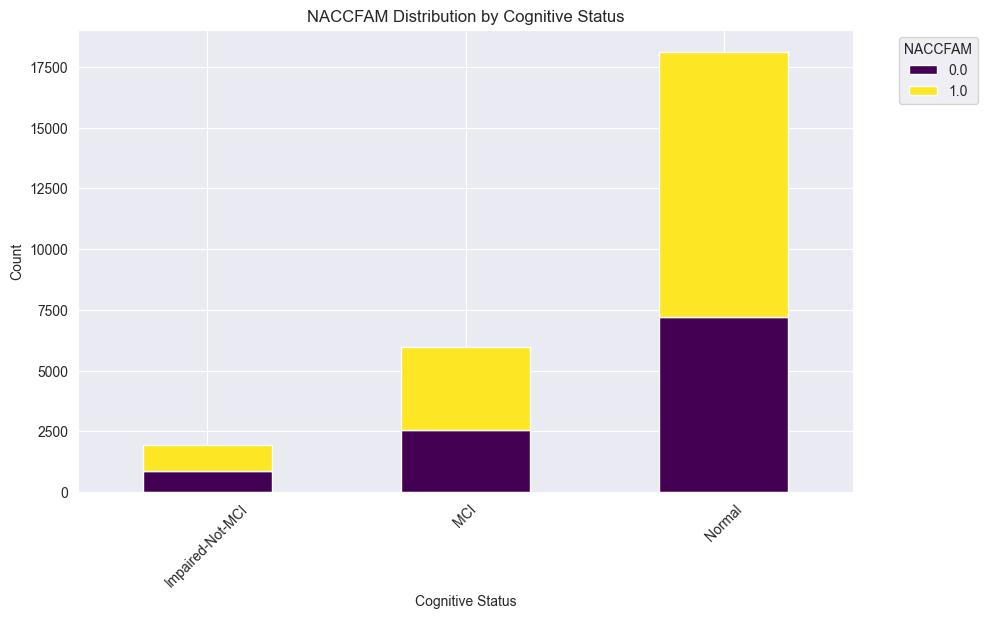

In [107]:
naccfam_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel("Cognitive Status")
plt.ylabel("Count")
plt.title("NACCFAM Distribution by Cognitive Status")
plt.legend(title="NACCFAM", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [108]:
naccam_distribution = df.groupby('CognitiveStatus')['NACCAM'].value_counts().unstack()
print(naccam_distribution)

NACCAM               0.0   1.0   2.0  3.0   8.0
CognitiveStatus                                
Impaired-Not-MCI   546.0   3.0   2.0  NaN   1.0
MCI               1615.0  11.0   3.0  1.0  10.0
Normal            4883.0  46.0  29.0  3.0  29.0


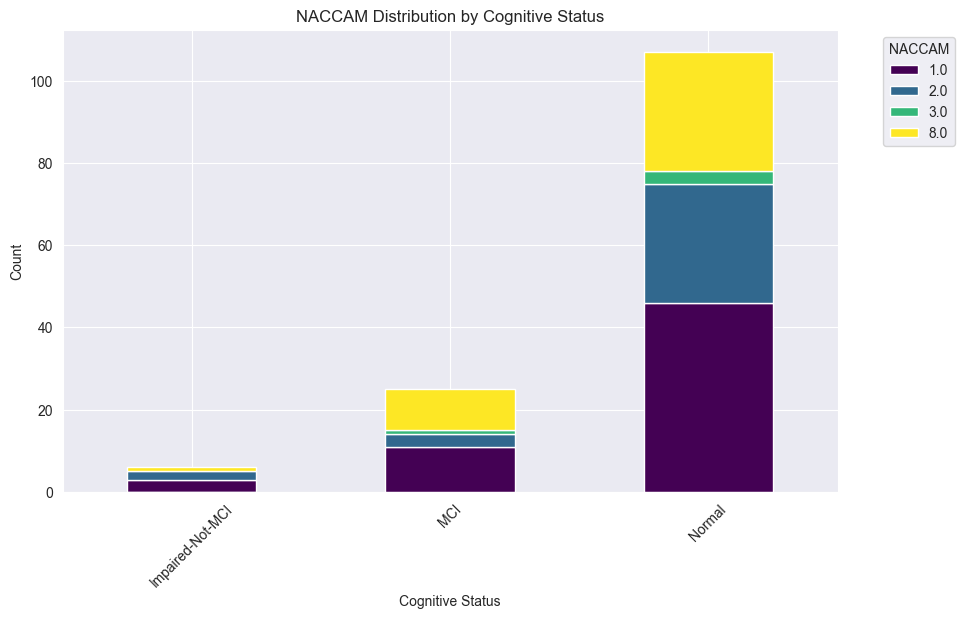

In [109]:
filtered_naccam_distribution = naccam_distribution.drop([0.0], axis = 1)
filtered_naccam_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel("Cognitive Status")
plt.ylabel("Count")
plt.title("NACCAM Distribution by Cognitive Status")
plt.legend(title="NACCAM", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

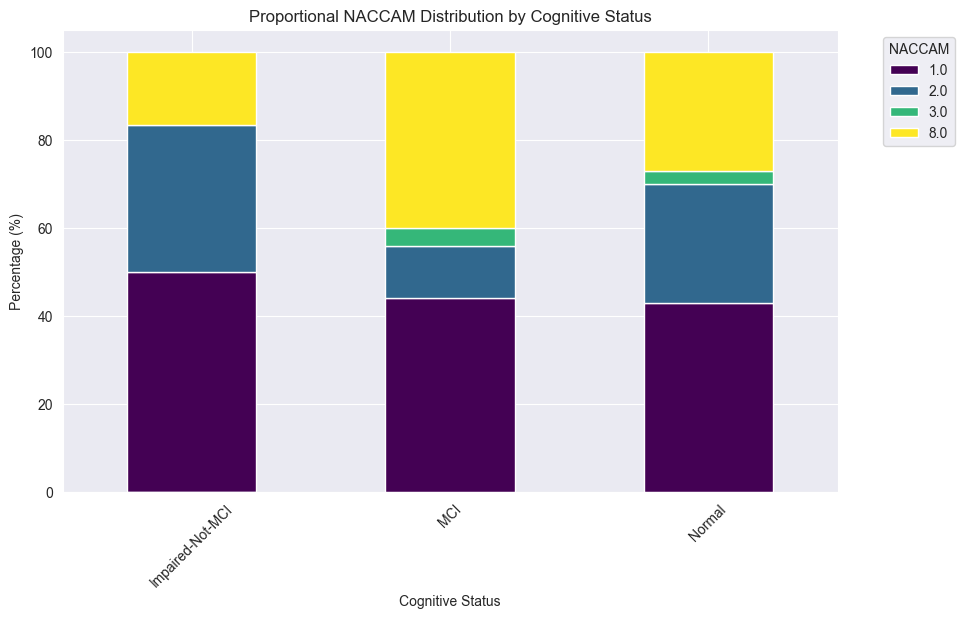

In [110]:
filtered_naccam_distribution_percent = filtered_naccam_distribution.div(filtered_naccam_distribution.sum(axis=1), axis=0) * 100
filtered_naccam_distribution_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel("Cognitive Status")
plt.ylabel("Percentage (%)")
plt.title("Proportional NACCAM Distribution by Cognitive Status")
plt.legend(title="NACCAM", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [111]:
filtered_naccamx = df[df['NACCAM'] == 8][['CognitiveStatus', 'NACCAMX']]
filtered_naccamx = filtered_naccamx[filtered_naccamx.NACCAMX != '.' ]
filtered_naccamx = filtered_naccamx[filtered_naccamx.NACCAMX != 'unknown']
summary = filtered_naccamx.groupby('CognitiveStatus').describe()
print(summary)

                NACCAMX                   
                  count unique    top freq
CognitiveStatus                           
MCI                   7      6  APOE4    2
Normal               17     16  APOE4    2


In [112]:
naccfadm_distribution = df.groupby('CognitiveStatus')['NACCFADM'].value_counts().unstack()
print(naccfadm_distribution)

NACCFADM              0    1
CognitiveStatus             
Impaired-Not-MCI   2244    6
MCI                6882   25
Normal            20409  107


From the results we can observe the following:
- NACCAM (family history of AD mutation):
    - There is very few records of family genetic mutations (460)
    - Among the positive results, the most prevalent was type 1 (APP), while the least prevalent was PS-2, or rare mutations in the other category, among which the most frequent was the APOE4 mutation, with 2 occurrences in both MCI and Normal groups
- NACCFAM (first degree family member with cognitive impairment)
    -  In all three groups, there was more positive records than the negative ones
    -  The proportions among the Normal and MCI groups are very similar, while Impaired-non-MCI falls a little behind
- NACCFADM (evidence of dominantly inherited AD mutation)
    - Very few positive results
    - Following similar pattern to other categories, proportions are similar for MCI and Impaired-non-MCI, while Normal group is a little more prevalent.

> Decline in functional activities
FAQ - BILLS, SHOPPING, STOVE, TRAVE

In [113]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

In [114]:
grouped = df.groupby('CognitiveStatus')
invalid_values = [8,9,-4]
for col in ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [115]:
summary_stats = grouped[['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']].describe()
print(summary_stats)

                    BILLS                                               \
                    count      mean       std  min  25%  50%  75%  max   
CognitiveStatus                                                          
Impaired-Not-MCI   2002.0  0.297702  0.722512  0.0  0.0  0.0  0.0  3.0   
MCI                6024.0  0.425133  0.806564  0.0  0.0  0.0  1.0  3.0   
Normal            18749.0  0.046402  0.288240  0.0  0.0  0.0  0.0  3.0   

                 SHOPPING                                               \
                    count      mean       std  min  25%  50%  75%  max   
CognitiveStatus                                                          
Impaired-Not-MCI   2135.0  0.207026  0.592239  0.0  0.0  0.0  0.0  3.0   
MCI                6521.0  0.238460  0.580379  0.0  0.0  0.0  0.0  3.0   
Normal            19317.0  0.035150  0.251433  0.0  0.0  0.0  0.0  3.0   

                    STOVE                                               \
                    count      mean 

In [116]:
proportions = grouped[['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']].mean()
print(proportions)

                     BILLS  SHOPPING     STOVE    TRAVEL
CognitiveStatus                                         
Impaired-Not-MCI  0.297702  0.207026  0.129664  0.290098
MCI               0.425133  0.238460  0.118467  0.398274
Normal            0.046402  0.035150  0.021684  0.053520


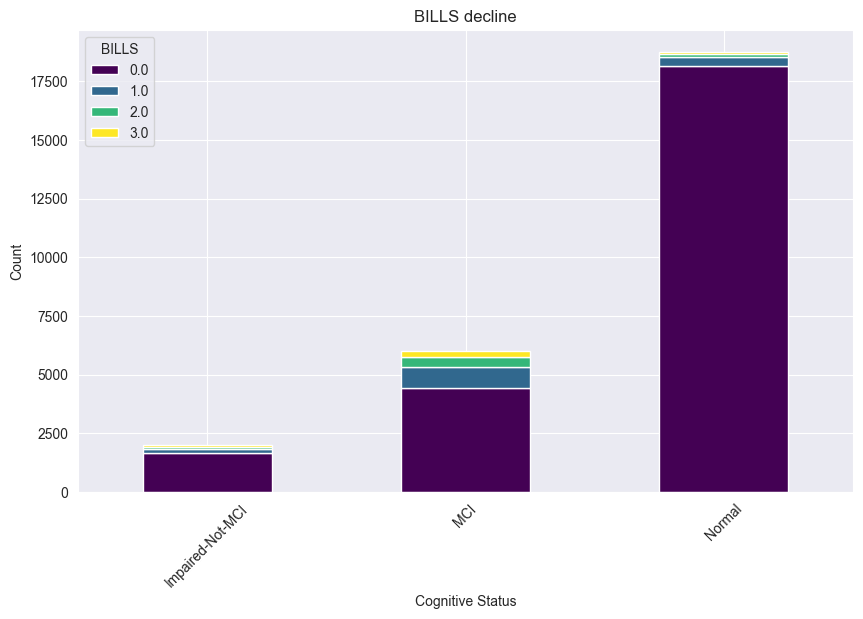

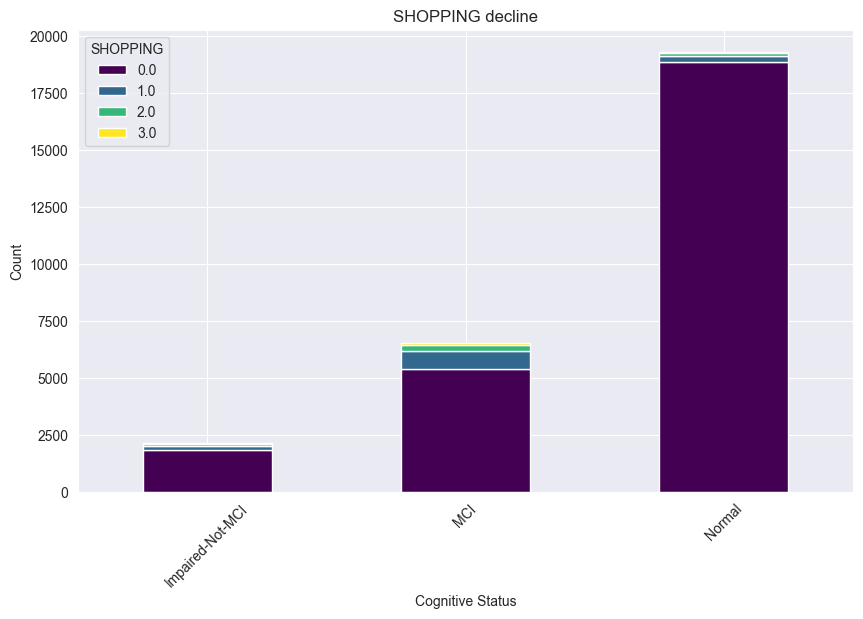

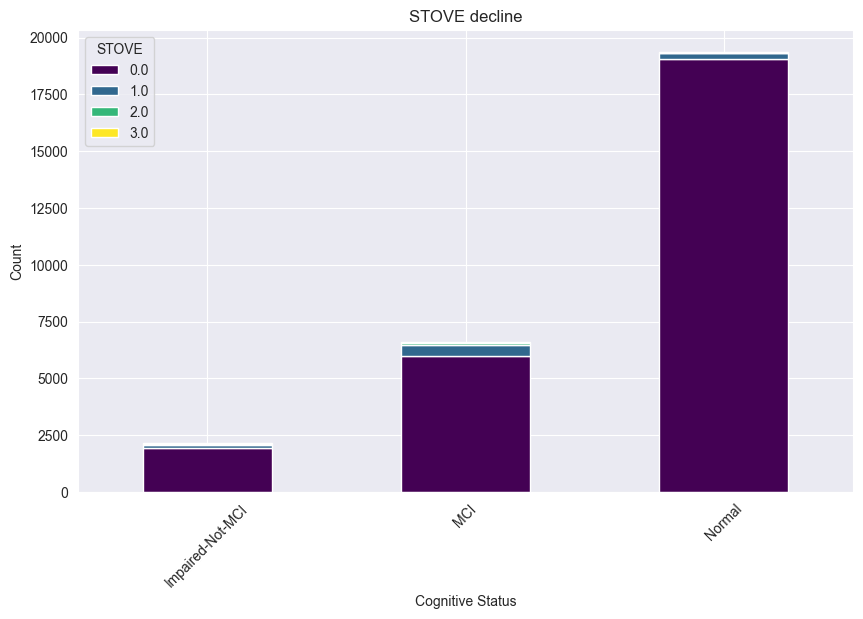

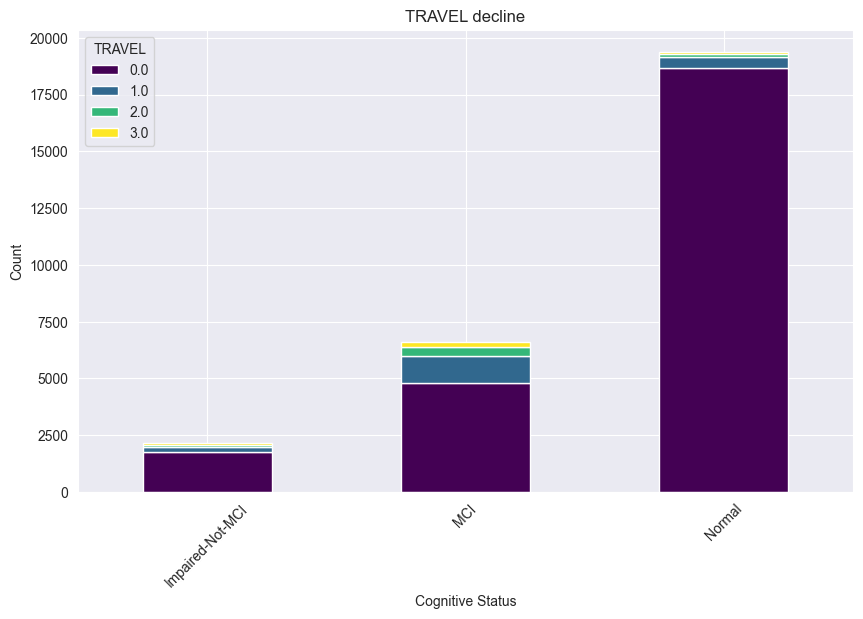

In [117]:
impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']
for var in impairment_vars:
    impairment_counts = df.groupby(['CognitiveStatus', var]).size().unstack()
    impairment_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.title(f"{var} decline")
    plt.xlabel('Cognitive Status')
    plt.ylabel('Count')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.show()

BILLS               0.0  1.0  2.0  3.0
CognitiveStatus                       
Impaired-Not-MCI   1645  192   91   74
MCI                4425  898  440  261
Normal            18167  370  136   76


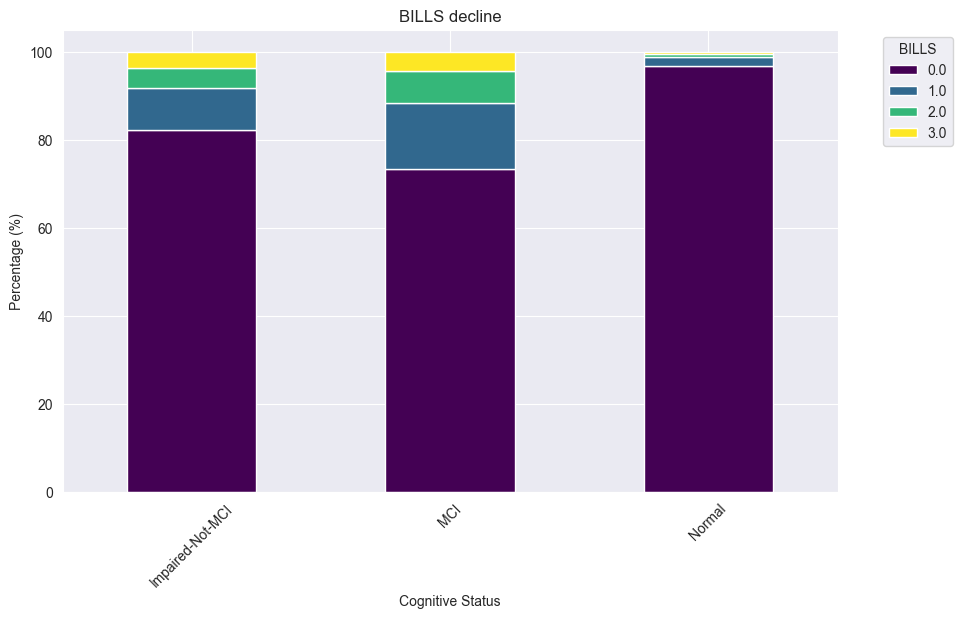

SHOPPING            0.0  1.0  2.0  3.0
CognitiveStatus                       
Impaired-Not-MCI   1850  170   73   42
MCI                5387  798  251   85
Normal            18874  254  142   47


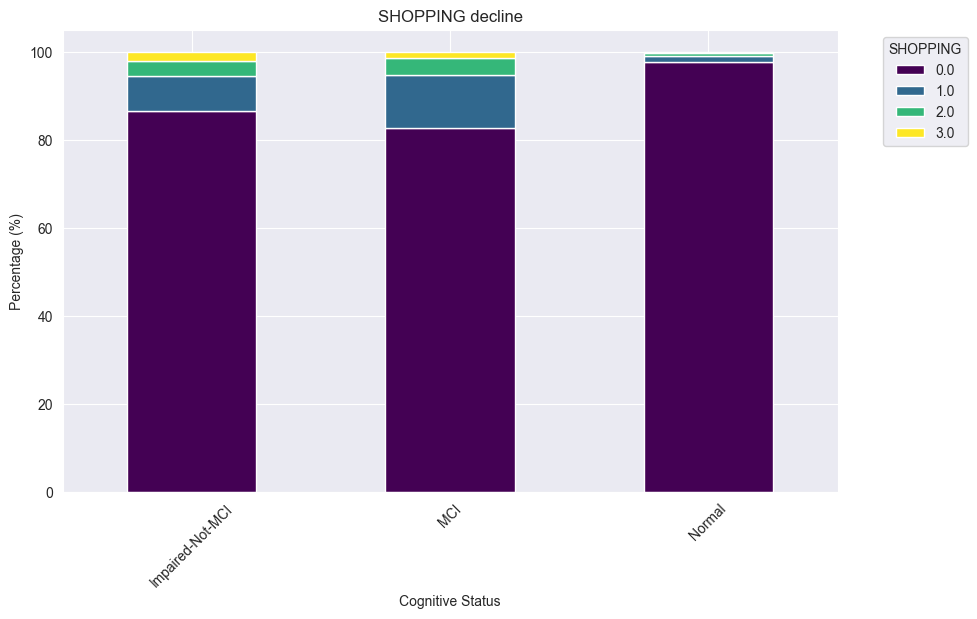

STOVE               0.0  1.0  2.0  3.0
CognitiveStatus                       
Impaired-Not-MCI   1940  145   44   15
MCI                5993  471  100   37
Normal            19045  260   32   32


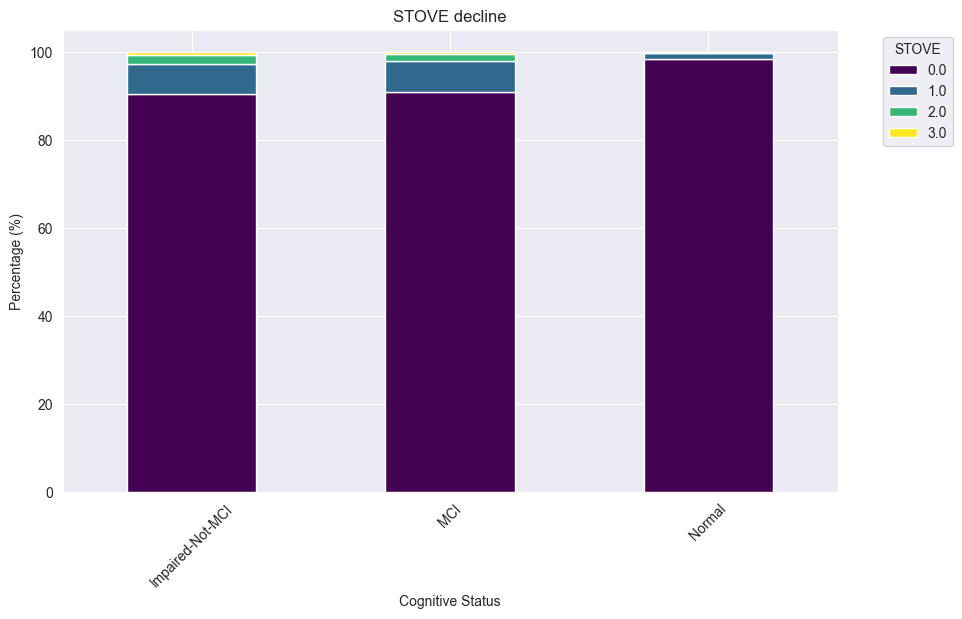

TRAVEL              0.0   1.0  2.0  3.0
CognitiveStatus                        
Impaired-Not-MCI   1761   239   68   83
MCI                4807  1191  384  224
Normal            18660   493  125   98


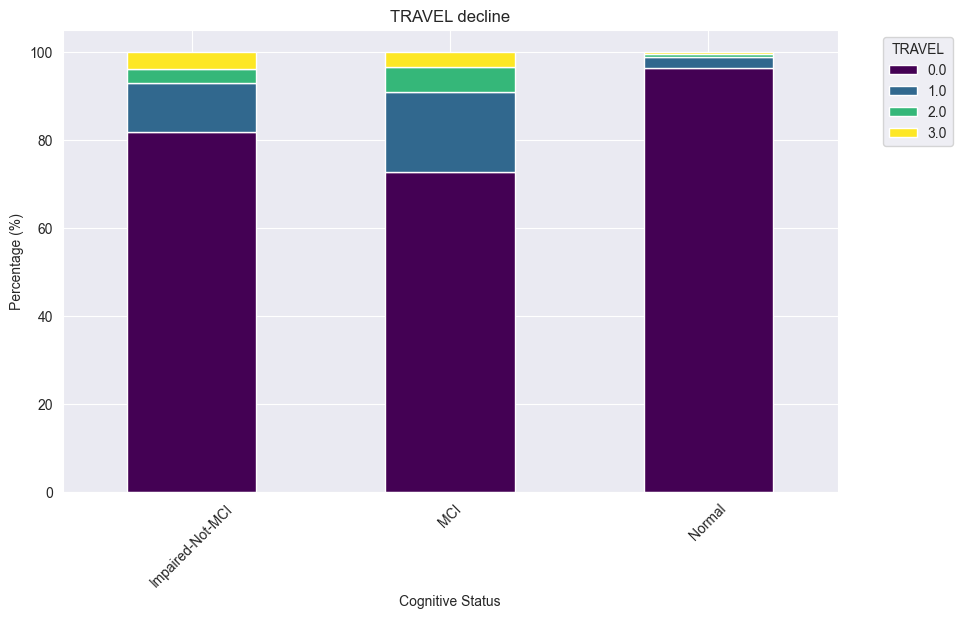

In [118]:
activities = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

for var in activities:
    distribution = df.groupby('CognitiveStatus')[var].value_counts().unstack()
    print(distribution)
    distribution_percent = distribution.div(distribution.sum(axis=1), axis=0) * 100
    distribution_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.xlabel('Cognitive Status')
    plt.ylabel('Percentage (%)')
    plt.title(f"{var} decline")
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

As can be seen, the impairment in daily functional activities follows a pattern in all categories. Patients in the normal group are presented with minimal impairment, rarely reaching values 2 and 3. The patients in the impaired-not-MCI group show increased level of impairment, and the patients in the MCI group also show an increased level of impairment. In all columns except STOVE there is a higher percentage of MCI patients with increased score of impairment than the impaired-not-MCI group.

We can proceed by grouping the variables bills, shopping, stove and travelling into one column to see if the patients share the impairments. By doing this, we also reduce the dimensionality of the data, collapsing 4 columns into 1.


                    count      mean       std  min  25%  50%  75%   max
CognitiveStatus                                                        
Impaired-Not-MCI   2250.0  0.862222  1.942857  0.0  0.0  0.0  1.0  12.0
MCI                6907.0  1.090054  1.897000  0.0  0.0  0.0  1.0  12.0
Normal            20516.0  0.146520  0.768169  0.0  0.0  0.0  0.0  12.0
CognitiveStatus
Impaired-Not-MCI    0.862222
MCI                 1.090054
Normal              0.146520
Name: Functional_Impairment, dtype: float64


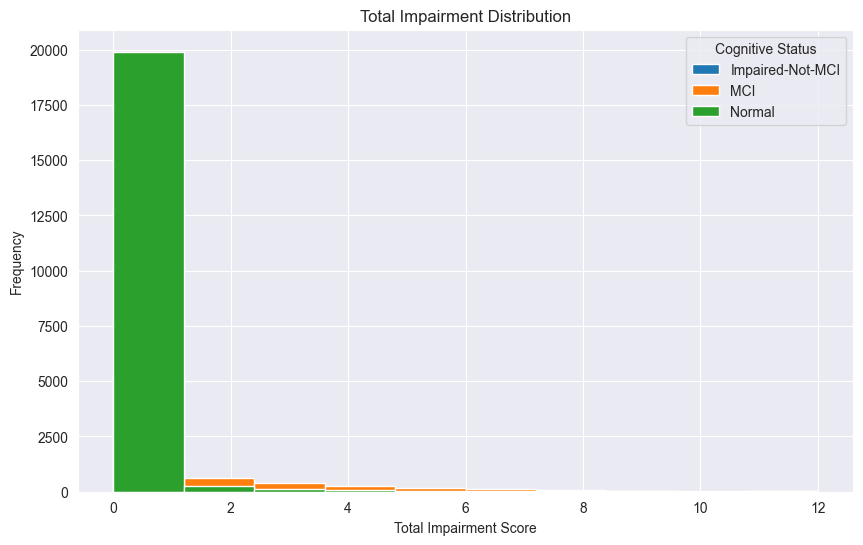

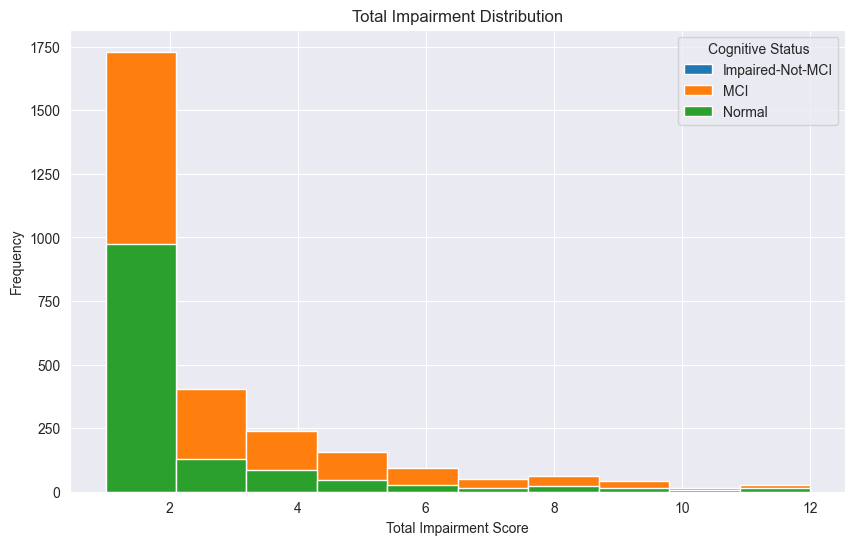

In [119]:
df['Functional_Impairment'] = df[impairment_vars].sum(axis=1, skipna=True)
summary_stats = grouped['Functional_Impairment'].describe()
proportions = grouped['Functional_Impairment'].mean()
print(summary_stats)
print(proportions)

df.groupby('CognitiveStatus')['Functional_Impairment'].hist(bins=10, figsize=(10,6), legend=True)
plt.xlabel('Total Impairment Score')
plt.ylabel('Frequency')
plt.title('Total Impairment Distribution')
plt.legend(title='Cognitive Status')
plt.show()

df_filtered = df[df['Functional_Impairment'] > 0]
df_filtered.groupby('CognitiveStatus')['Functional_Impairment'].hist(bins=10, figsize=(10,6), legend=True)
plt.xlabel('Total Impairment Score')
plt.ylabel('Frequency')
plt.title('Total Impairment Distribution')
plt.legend(title='Cognitive Status')
plt.show()

From the results of these graphs, we can see that whenever we combine the values into one, only in rare cases we get values of 9 and higher. The most represented is no impairment at all, followed by a score of 1. It is interesting that there are more cases of score 12 than 11, as well as the fact that the mean for the MCI group is above 1.

> Now we are going to focus on parkinson signs, gait disorders (PARKSIGN, GAITDIS, BRADY), cerebrovascular diseases and cortical deficits (CVDCOG, CBSTROKE, CORTDEF) which can be helpful with identifying MCI 

In [120]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

In [121]:
grouped = df.groupby('CognitiveStatus')
invalid_values = [8,9,-4]
for col in ['PARKSIGN', 'GAITDIS', 'BRADY']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [122]:
proportions = grouped[['PARKSIGN', 'GAITDIS', 'BRADY']].mean()
print(proportions)

                  PARKSIGN   GAITDIS     BRADY
CognitiveStatus                               
Impaired-Not-MCI  0.051606  0.054600  0.024083
MCI               0.083281  0.073306  0.046681
Normal            0.027165  0.026395  0.015538


PARKSIGN           0.0  1.0
CognitiveStatus            
Impaired-Not-MCI   827   45
MCI               2895  263
Normal            8774  245


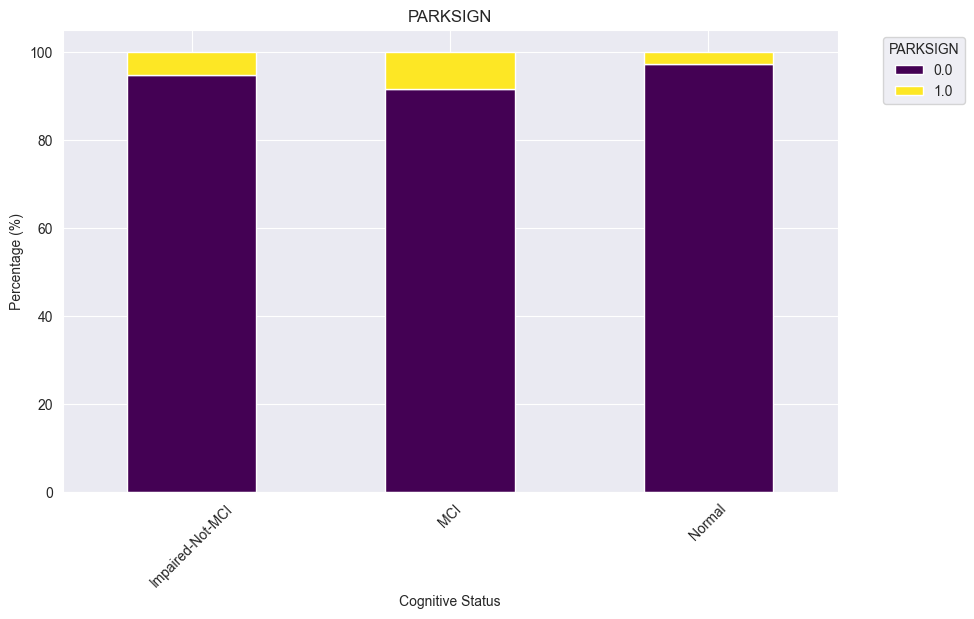

GAITDIS             0.0  1.0
CognitiveStatus             
Impaired-Not-MCI   1264   73
MCI                3350  265
Normal            10623  288


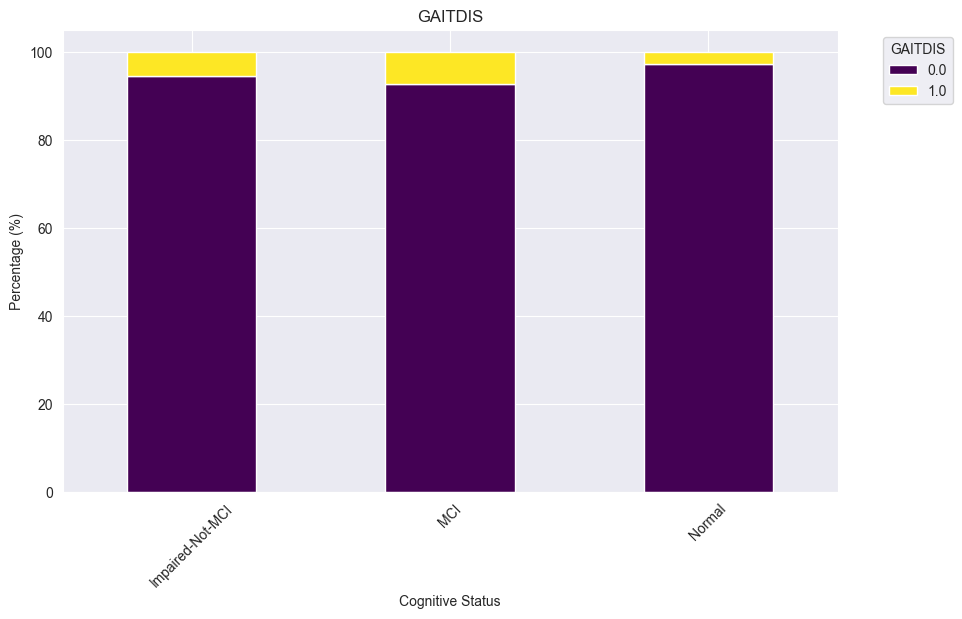

BRADY              0.0  1.0
CognitiveStatus            
Impaired-Not-MCI   851   21
MCI               3002  147
Normal            8870  140


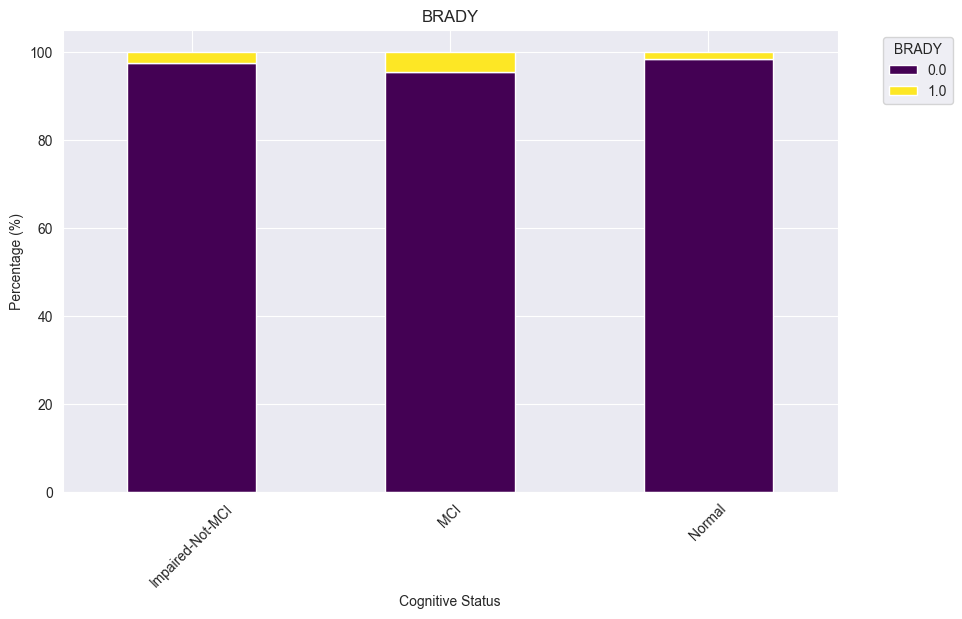

In [123]:
signs = ['PARKSIGN', 'GAITDIS', 'BRADY']

for var in signs:
    distribution = df.groupby('CognitiveStatus')[var].value_counts().unstack()
    print(distribution)
    distribution_percent = distribution.div(distribution.sum(axis=1), axis=0) * 100
    distribution_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.xlabel('Cognitive Status')
    plt.ylabel('Percentage (%)')
    plt.title(f"{var}")
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

In [124]:
for col in ['PARKSIGN', 'GAITDIS', 'BRADY']:
    contingency_table = pd.crosstab(df[col], df['CognitiveStatus'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}: p-value = {p}")

Chi-Square test for PARKSIGN: p-value = 1.458448448161112e-40
Chi-Square test for GAITDIS: p-value = 7.128013339950764e-37
Chi-Square test for BRADY: p-value = 5.039304239819038e-22


From the results that can be seen on the graphs, patients that are classified as having MCI are more frequently classified as having signs of parkinsons, gait and bradykinesia, with patients classified as Impaired-not-MCI are also slightly more inclined of having signs of parkinsons, gait or bradykinesia than normal patients. All the columns have a p-value < 0.05 as can be seen from the chi-square test, which means they are statistically significant.

In [125]:
grouped = df.groupby('CognitiveStatus')
invalid_values = [8,9,-4]
for col in ['CVDCOG', 'CBSTROKE', 'CORTDEF']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [126]:
proportions = grouped[['CVDCOG', 'CBSTROKE', 'CORTDEF']].mean()
print(proportions)

                    CVDCOG  CBSTROKE   CORTDEF
CognitiveStatus                               
Impaired-Not-MCI  0.127986  0.068329  0.003448
MCI               0.119238  0.086165  0.002538
Normal            0.030363  0.039012  0.000444


CVDCOG             0.0  1.0
CognitiveStatus            
Impaired-Not-MCI   511   75
MCI               1433  194
Normal            2459   77


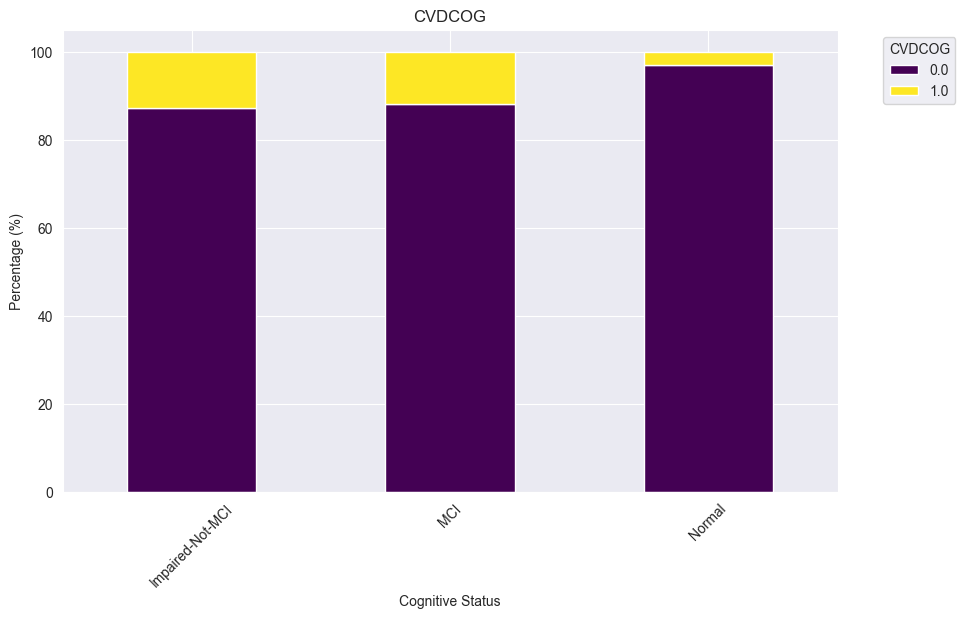

CBSTROKE            0.0  1.0  2.0
CognitiveStatus                  
Impaired-Not-MCI   2081   22   63
MCI                6322   83  245
Normal            19870  121  336


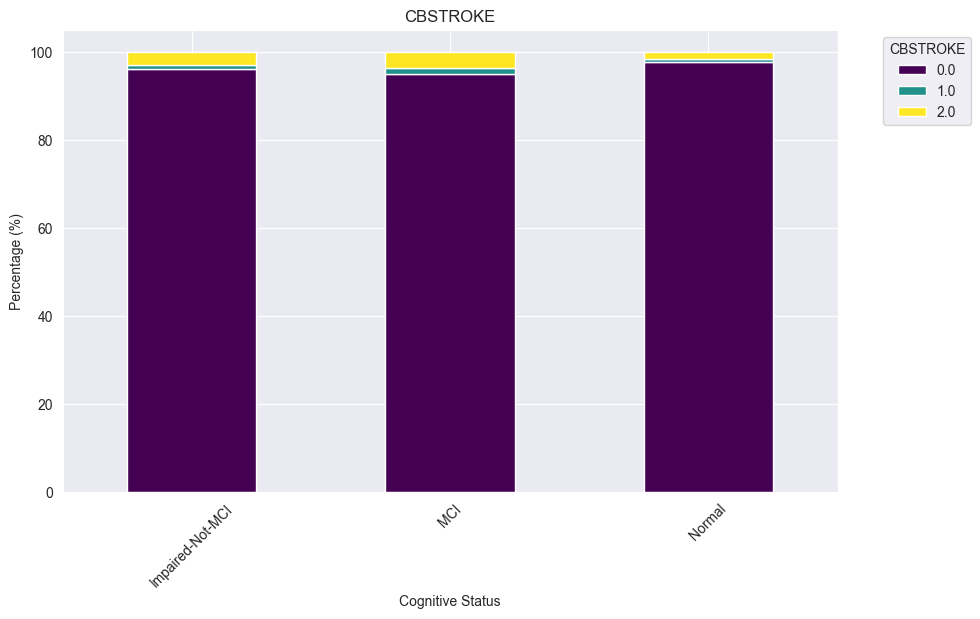

CORTDEF            0.0  1.0
CognitiveStatus            
Impaired-Not-MCI   867    3
MCI               3144    8
Normal            9011    4


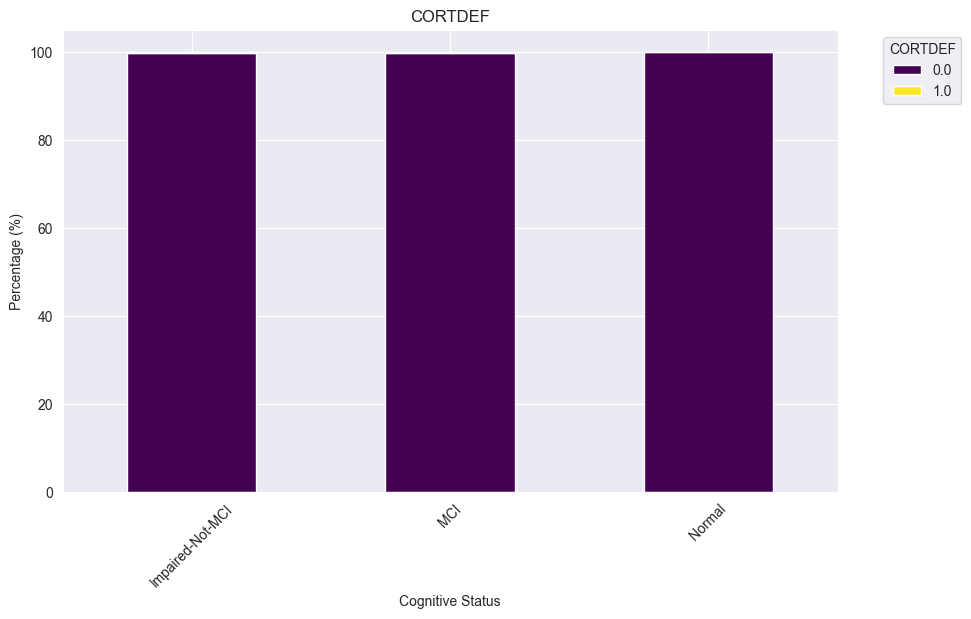

In [127]:
cort = ['CVDCOG', 'CBSTROKE', 'CORTDEF']

for var in cort:
    distribution = df.groupby('CognitiveStatus')[var].value_counts().unstack()
    print(distribution)
    distribution_percent = distribution.div(distribution.sum(axis=1), axis=0) * 100
    distribution_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.xlabel('Cognitive Status')
    plt.ylabel('Percentage (%)')
    plt.title(f"{var}")
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

In [128]:
for col in ['CVDCOG', 'CBSTROKE', 'CORTDEF']:
    contingency_table = pd.crosstab(df[col], df['CognitiveStatus'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}: p-value = {p}")

Chi-Square test for CVDCOG: p-value = 2.0059428667925142e-32
Chi-Square test for CBSTROKE: p-value = 1.4973041403959471e-27
Chi-Square test for CORTDEF: p-value = 0.0013629893202068762


From these graphs we can see that the CORTDEF (Cortical cognitive deficit) has almost no representation among all groups. The CVDCOG (Cerebrovascular disease contributing to cognitive impairment) shows that the both MCI and Impaired-not-MCI patients are more often classified as having one, while the Impaired-not-MCI had the highest mean value. The CBSTROKE column displays that the MCI group has the highest representation of both active and inactive stroke, the Impaired-not-MCI being close behind and the normal group having almost no representation. The chi-square test for all columns also had a p-value < 0.05, which means they are statistcally significant.

> Now we are going to focus on the Clinician assesed impairment domains (COGMEM, COGJUDG, COGLANG, COGATTN)

In [129]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

In [130]:
grouped = df.groupby('CognitiveStatus')
invalid_values = [9,-4]
for col in ['COGMEM', 'COGJUDG', 'COGLANG', 'COGATTN']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [131]:
proportions = grouped[['COGMEM', 'COGJUDG', 'COGLANG', 'COGATTN']].mean()
print(proportions)

                    COGMEM   COGJUDG   COGLANG   COGATTN
CognitiveStatus                                         
Impaired-Not-MCI  0.492883  0.274431  0.157965  0.200090
MCI               0.876865  0.369600  0.278407  0.237246
Normal            0.044322  0.014093  0.019064  0.016829


COGMEM              0.0   1.0
CognitiveStatus              
Impaired-Not-MCI   1140  1108
MCI                 850  6053
Normal            19600   909


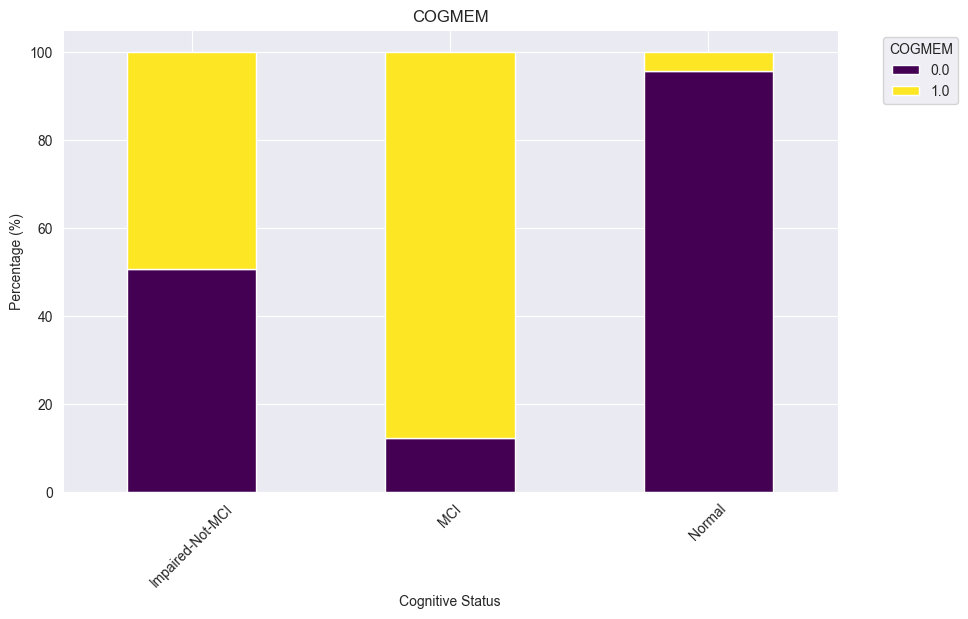

COGJUDG             0.0   1.0
CognitiveStatus              
Impaired-Not-MCI   1626   615
MCI                4334  2541
Normal            20218   289


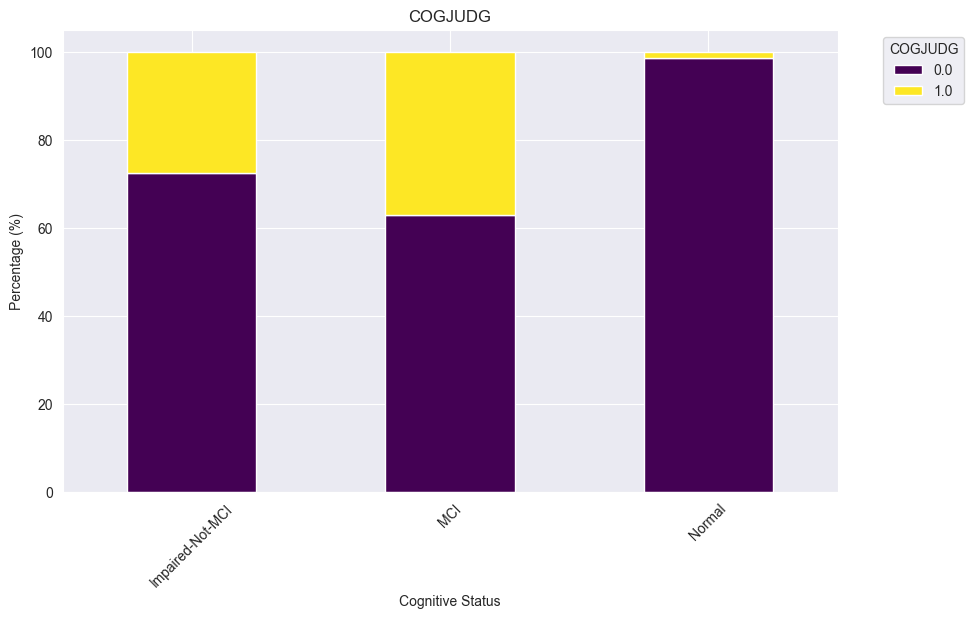

COGLANG             0.0   1.0
CognitiveStatus              
Impaired-Not-MCI   1887   354
MCI                4966  1916
Normal            20119   391


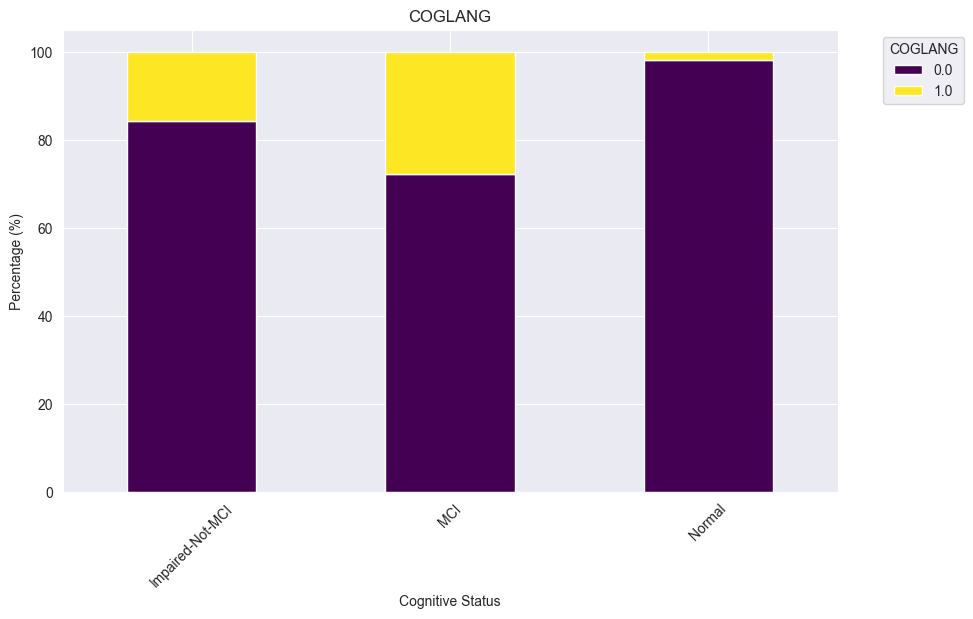

COGATTN             0.0   1.0
CognitiveStatus              
Impaired-Not-MCI   1787   447
MCI                5218  1623
Normal            20155   345


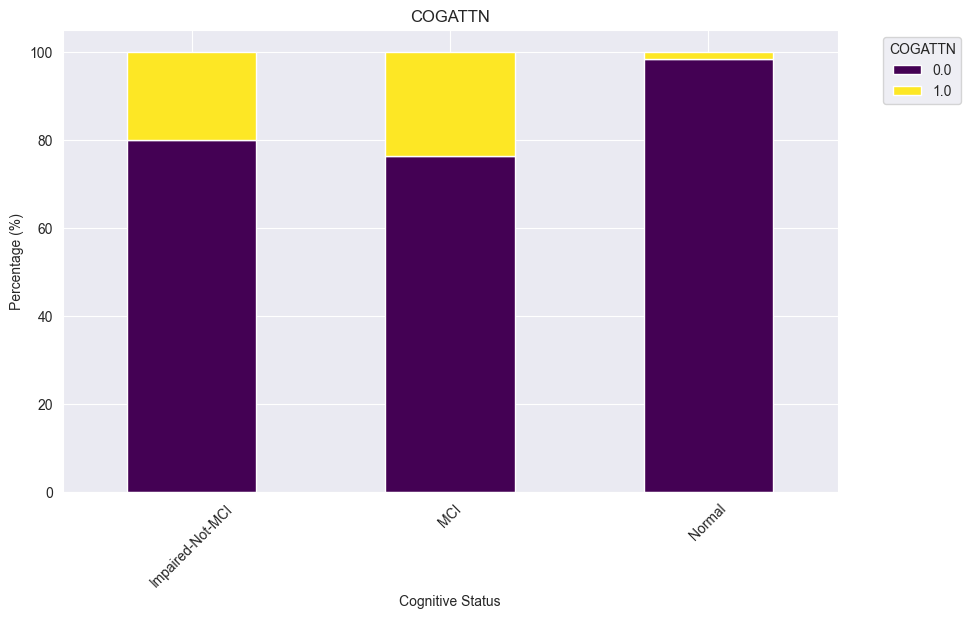

In [132]:
cort = ['COGMEM', 'COGJUDG', 'COGLANG', 'COGATTN']

for var in cort:
    distribution = df.groupby('CognitiveStatus')[var].value_counts().unstack()
    print(distribution)
    distribution_percent = distribution.div(distribution.sum(axis=1), axis=0) * 100
    distribution_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.xlabel('Cognitive Status')
    plt.ylabel('Percentage (%)')
    plt.title(f"{var}")
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

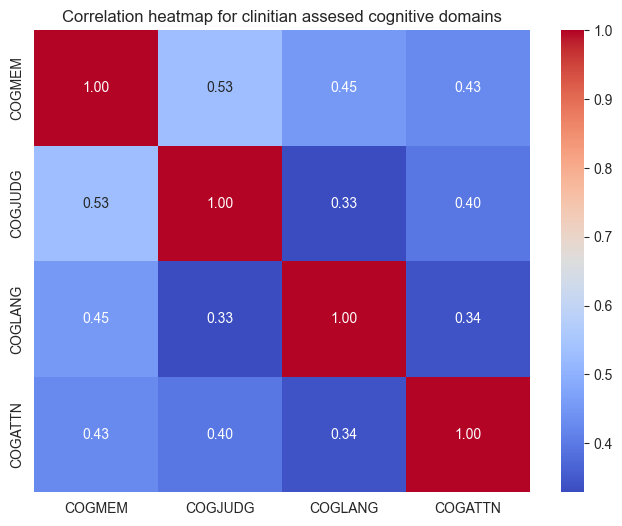

In [133]:
corr = df[['COGMEM', 'COGJUDG', 'COGLANG', 'COGATTN']].corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap for clinitian assesed cognitive domains')
plt.show()

The graphs show that the Normal patients have close to no representation among the Memory, Judgment, Language, and Attention assessed by clinicians. In the memory assessment, the MCI patients have above 80% positive representation, as well as the Impaired-not-MCI having almost 50% positive representation. The other columns follow the similar pattern, where the MCI group has 20%-40% positive representation, and Impaired-not-MCI falling a little behind. On the correlation heatmap we can see teh correlation being 0.33 - 0.53, with the highest being between memory - judgment, and memory - language.

### Data structure, and preparation
make sure that we replace the vales like 8,9... which represent NaN values with actual NaN

First we drop the columns that contain over 20% missing data and the columns that are not in the data dictionary

In [134]:
initial = df.shape[1]
threshold = 0.2 * len(df)

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

df_cleaned = df.dropna(thresh=threshold, axis=1)

remaining = df_cleaned.shape[1]

dropped = initial - remaining

print(f"initial: {initial}")
print(f"remaining: {remaining}")
print(f"dropped: {dropped}")

initial: 971
remaining: 529
dropped: 442


I decided to do the data processing in a different notebook, in order to preserve clarity and readability - preprocessing.ipynb